In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('population_total.xlsx')
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [3]:
print(df.columns)  
print(df.dtypes)

Index(['country',      1800,      1801,      1802,      1803,      1804,
            1805,      1806,      1807,      1808,
       ...
            2091,      2092,      2093,      2094,      2095,      2096,
            2097,      2098,      2099,      2100],
      dtype='object', length=302)
country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object


In [4]:
df=pd.melt(df,id_vars=['country'],var_name='year',value_name='population')
df

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
...,...,...,...
59292,Samoa,2100,310k
59293,Yemen,2100,53.2M
59294,South Africa,2100,79.2M
59295,Zambia,2100,81.5M


In [5]:
print(df.head())  
print(df.dtypes)

                country  year population
0           Afghanistan  1800      3.28M
1                Angola  1800      1.57M
2               Albania  1800       400k
3               Andorra  1800       2650
4  United Arab Emirates  1800      40.2k
country       object
year          object
population    object
dtype: object


In [6]:
df['year'] = df['year'].astype(int)
df['country'] = df['country'].astype('category')
df['population'] = df['population'].astype(str)
print(df['population'].unique()[:20])

['3.28M' '1.57M' '400k' '2650' '40.2k' '534k' '413k' '37k' '200k' '3M'
 '880k' '899k' '3.25M' '637k' '1.67M' '19.2M' '2.25M' '64.5k' '27.4k'
 '852k']


In [ ]:
def replace_pop_count(value):
    value = str(value).upper()
    if 'K' in value:
        return float(value.replace('K', '')) * 1_000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1_000_000_000
    else:
        return float(value)

df['population'] = df['population'].astype(str).apply(replace_pop_count)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     59297 non-null  category
 1   year        59297 non-null  int32   
 2   population  59297 non-null  float64 
dtypes: category(1), float64(1), int32(1)
memory usage: 816.4 KB


In [10]:
print(df['population'].dtype)
print(df['population'].unique()[:20])

float64
[3.28e+06 1.57e+06 4.00e+05 2.65e+03 4.02e+04 5.34e+05 4.13e+05 3.70e+04
 2.00e+05 3.00e+06 8.80e+05 8.99e+05 3.25e+06 6.37e+05 1.67e+06 1.92e+07
 2.25e+06 6.45e+04 2.74e+04 8.52e+05]


In [12]:
print(df[df.duplicated(subset=['country', 'year'], keep=False)])

Empty DataFrame
Columns: [country, year, population]
Index: []


Number of unique countries: 197
Year range: 1800 to 2100


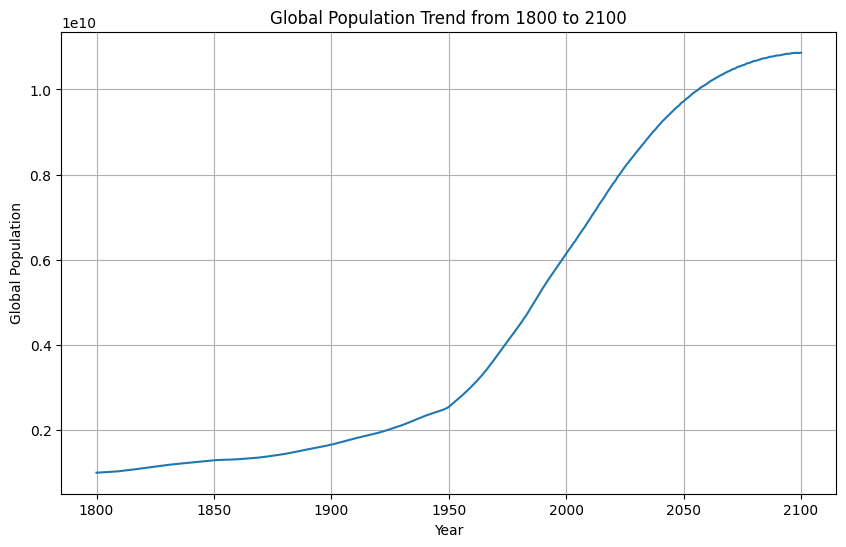

In [14]:
print("Number of unique countries:", df['country'].nunique())
print("Year range:", df['year'].min(), "to", df['year'].max())
population_trend = df.groupby('year')['population'].sum()
plt.figure(figsize=(10, 6))
plt.plot(population_trend.index, population_trend.values)
plt.xlabel('Year')
plt.ylabel('Global Population')
plt.title('Global Population Trend from 1800 to 2100')
plt.grid(True)
plt.show()


In [28]:
latest_year = df['year'].max()
top_countries = df[df['year'] == latest_year].nlargest(10, 'population')

print(top_countries[['country', 'population']])  # Debugging step

                country    population
59179             India  1.450000e+09
59132             China  1.060000e+09
59228           Nigeria  7.330000e+08
59286     United States  4.340000e+08
59236          Pakistan  4.030000e+08
59135  Congo, Dem. Rep.  3.620000e+08
59178         Indonesia  3.210000e+08
59155          Ethiopia  2.940000e+08
59282          Tanzania  2.860000e+08
59151             Egypt  2.250000e+08


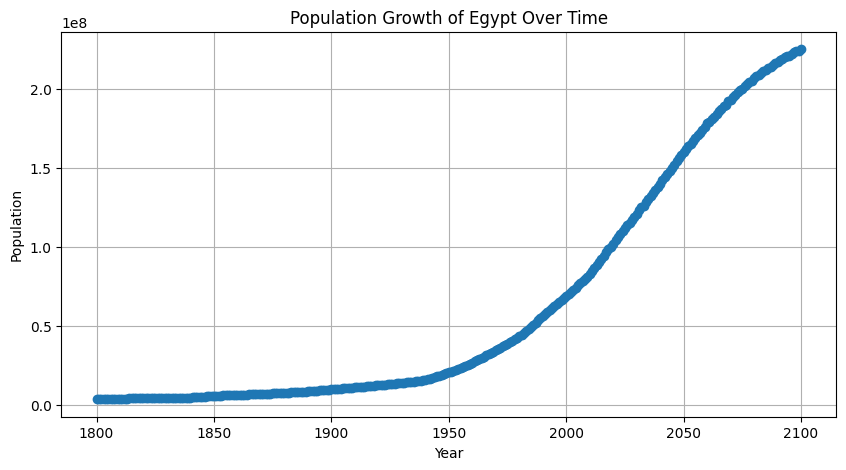

In [17]:
country = "Egypt"
country_trend = df[df['country'] == country]

plt.figure(figsize=(10, 5))
plt.plot(country_trend['year'], country_trend['population'], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title(f"Population Growth of {country} Over Time")
plt.grid(True)
plt.show()


C:\Users\alaa6\AppData\Local\Temp\ipykernel_23340\3433443586.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_population_changes = df.groupby('country')['population'].agg(lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100)


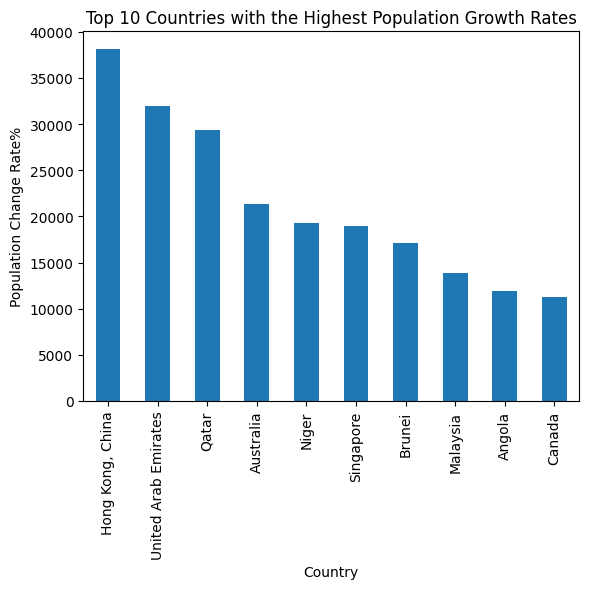

In [37]:
country_population_changes = df.groupby('country')['population'].agg(lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100)
growth = country_population_changes.sort_values(ascending=False)
growth.head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Population Change Rate%')
plt.title('Top 10 Countries with the Highest Population Growth Rates')
plt.show()